In [161]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [162]:
# apple podcasts dot com
response = requests.get("https://itunes.apple.com/search?media=podcast&term=accra")
response.status_code

200

In [163]:
json_data = response.json()
json_data

{'resultCount': 32,
 'results': [{'wrapperType': 'track',
   'kind': 'podcast',
   'collectionId': 1350924685,
   'trackId': 1350924685,
   'artistName': 'The Gold Coast Report',
   'collectionName': 'Sincerely Accra',
   'trackName': 'Sincerely Accra',
   'collectionCensoredName': 'Sincerely Accra',
   'trackCensoredName': 'Sincerely Accra',
   'collectionViewUrl': 'https://podcasts.apple.com/us/podcast/sincerely-accra/id1350924685?uo=4',
   'feedUrl': 'https://pinecast.com/feed/sincerely-accra',
   'trackViewUrl': 'https://podcasts.apple.com/us/podcast/sincerely-accra/id1350924685?uo=4',
   'artworkUrl30': 'https://is4-ssl.mzstatic.com/image/thumb/Podcasts113/v4/6f/95/52/6f955238-8759-c122-6cfa-0f52587f156c/mza_13206003106238112838.png/30x30bb.jpg',
   'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Podcasts113/v4/6f/95/52/6f955238-8759-c122-6cfa-0f52587f156c/mza_13206003106238112838.png/60x60bb.jpg',
   'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Podcasts113

In [164]:
json_data['results'][0].keys()
accra_pods = json_data['results']
for podcast in accra_pods:
    print(podcast['collectionName'], podcast['country'])

Sincerely Accra USA
Anesthesia and Critical Care Reviews and Commentary (ACCRAC) Podcast USA
ACCRA AFTER HOURS 🇬🇭🇬🇭🇬🇭🇬🇭 USA
Accra's Round Table USA
The Sound of Accra Podcast USA
Link Up Accra USA
Accra Community Church Podcasts USA
Creative In Accra USA
Redeemer City Church Accra Podcast USA
God’s Eternal Purpose Radio Broadcast USA
Piwc Accra USA
Truth Incorporated USA
Lounge Accra USA
Daily Star Devotion by Psr. Mike S. Banda of Glorious Trinity Synagogue (G.T.S) USA
Hustle Accra!!! USA
Accra Sugar Mummy USA
EIFC - Accra USA
Live From Accra USA
ROSA - ATU Sermons USA
THE END TIME BEATITUDES (PART 1) USA
De Patrick Show USA
TOHI CHURCH PODCAST USA
Pastor Fahd Awinbilla USA
El Manuscrito Encontrado En Accra USA
The Accra Saga with Rae USA
Hustle Accra!!! USA
ATL 2 ACC Podcast: Atlanta to Accra USA
ATL 2 ACC Podcast: Atlanta to Accra USA
Landmarks, Usser Fort, Accra USA
Accra Food Festival Digital 2020 USA
ATL 2 ACC Podcast: Atlanta to Accra USA
EIFC - Accra USA


In [165]:
## podcast index dot com

import hashlib
from datetime import datetime
import calendar

d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())

apiKey = 'B9EGAB3NVUD6JAGKTF4J'
apiSecret = 'Qb5A9C7NDjZu9jEV$5mqHpWbyXMhd7xvz3EMbbXE'
apiHeaderTime = str(unixtime)

# Hash  to get the Authorization token
hashy = (apiKey+apiSecret+apiHeaderTime)
hash_object = hashlib.sha1(hashy.encode())
hashy = hash_object.hexdigest()

params = {'User-Agent': 'Chrome/104.0.0.0',
          'X-Auth-Date': apiHeaderTime,
          'X-Auth-Key': apiKey,
          'Authorization': hashy}

response = requests.get(' https://api.podcastindex.org/api/1.0/podcasts/trending?pretty&lang=en&min=1000', headers=params)
data = response.json()

data

{'status': 'true',
 'feeds': [{'id': 227573,
   'url': 'https://podnews.net/rss',
   'title': 'Podnews Daily',
   'description': 'Daily news about the global podcasting and on-demand audio industry. Curated by James Cridland editor@podnews.net - visit https://podnews.net to get our free newsletter for all the links and more. [Podcast Index/mp3]',
   'author': 'Podnews LLC',
   'image': 'https://podnews.net/static/podnews-2000x2000.png',
   'artwork': 'https://podnews.net/static/podnews-2000x2000.png',
   'newestItemPublishTime': 1668076770,
   'itunesId': 1325018583,
   'trendScore': 131,
   'language': 'en',
   'categories': {'55': 'News',
    '56': 'Daily',
    '102': 'Technology',
    '9': 'Business'}},
  {'id': 743229,
   'url': 'https://feeds.simplecast.com/54nAGcIl',
   'title': 'The Daily',
   'description': 'This is what the news should sound like. The biggest stories of our time, told by the best journalists in the world. Hosted by Michael Barbaro and Sabrina Tavernise. Twenty

In [166]:
data.keys()

dict_keys(['status', 'feeds', 'count', 'max', 'since', 'description'])

In [167]:
feeds = data['feeds']
len(feeds)

40

In [168]:
feeds[0].keys()

dict_keys(['id', 'url', 'title', 'description', 'author', 'image', 'artwork', 'newestItemPublishTime', 'itunesId', 'trendScore', 'language', 'categories'])

In [169]:
desc = data['since']
desc

1668012873

In [170]:
# Key: B9EGAB3NVUD6JAGKTF4J
# Secret: Qb5A9C7NDjZu9jEV$5mqHpWbyXMhd7xvz3EMbbXE

In [171]:
df = pd.DataFrame.from_records(feeds)
df.head()

,id,url,title,description,author,image,artwork,newestItemPublishTime,itunesId,trendScore,language,categories
0,227573,https://podnews.net/rss,Podnews Daily,Daily news about the global podcasting and on-...,Podnews LLC,https://podnews.net/static/podnews-2000x2000.png,https://podnews.net/static/podnews-2000x2000.png,1668076770,1325018583,131,en,"{'55': 'News', '56': 'Daily', '102': 'Technolo..."
1,743229,https://feeds.simplecast.com/54nAGcIl,The Daily,This is what the news should sound like. The b...,The New York Times,https://image.simplecastcdn.com/images/03d8b49...,https://image.simplecastcdn.com/images/03d8b49...,1668077100,1200361736,100,en,"{'55': 'News', '56': 'Daily'}"
2,1447,https://feeds.megaphone.fm/GLSS9533070472,Missing,"<p>Missing tells stories of missing people, ho...",Crawlspace Media & Glassbox Media,https://megaphone.imgix.net/podcasts/03861a6e-...,https://megaphone.imgix.net/podcasts/03861a6e-...,1668067200,1006974447,17,en,{'103': 'True Crime'}
3,551506,https://rss.art19.com/erm-mfm,My Favorite Murder with Karen Kilgariff and Ge...,Lifelong fans of true crime stories Karen Kilg...,Exactly Right,https://content.production.cdn.art19.com/image...,https://content.production.cdn.art19.com/image...,1668067260,1074507850,17,en,{'103': 'True Crime'}
4,941169,https://feeds.megaphone.fm/ADL8288293115,Swindled,"<p>Utilizes narrative storytelling, archival a...",A Concerned Citizen,https://megaphone.imgix.net/podcasts/0d6c1410-...,https://megaphone.imgix.net/podcasts/0d6c1410-...,1668041987,1308717668,15,en,"{'77': 'Society', '78': 'Culture', '79': 'Docu..."


### Description of Columns
**column name : data type : description**
- **id** : integer : The internal PodcastIndex.org Feed ID.
- **url** : URL : Current feed URL
- **title** : string : Name of the feed
- **description** : string : The channel-level description
- **author** : string : The channel-level author element.
- **imag**e : URL :The channel-level image element.
- **artwork** : URL : The seemingly best artwork we can find for the feed. Might be the same as image in most instances.
- **newestItemPublishTime** : integer : The date and time the most recent episode in the feed was published
- **itunesId** : integer : The iTunes ID of this feed if there is one, and we know what it is.
- **trendScore** : integer :The ranking for how the podcast is trending in the index
- **language** : string :The channel-level language specification of the feed. Languages accord with the RSS Language Spec.
- **categories** : {...} : An array of categories, where the index is the Category ID and the value is the Category Name.

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     40 non-null     int64 
 1   url                    40 non-null     object
 2   title                  40 non-null     object
 3   description            40 non-null     object
 4   author                 40 non-null     object
 5   image                  40 non-null     object
 6   artwork                40 non-null     object
 7   newestItemPublishTime  40 non-null     int64 
 8   itunesId               40 non-null     int64 
 9   trendScore             40 non-null     int64 
 10  language               40 non-null     object
 11  categories             40 non-null     object
dtypes: int64(4), object(8)
memory usage: 3.9+ KB


## Cleaning Data

There are no null values (yay!) cleaning is will therefore focus mainly on transforming the date and the categories columns.

In [173]:
# transforming date columns
df['newestItemPublishTime'] = pd.to_datetime(df['newestItemPublishTime'], unit='s', yearfirst=False)
df['newestItemPublishTime'].value_counts()

2022-11-09 17:00:00    5
2022-11-10 10:00:00    2
2022-11-10 10:39:30    1
2022-11-09 19:53:00    1
2022-11-09 20:38:30    1
2022-11-09 20:56:32    1
2022-11-09 23:26:17    1
2022-11-10 06:00:00    1
2022-11-10 09:00:00    1
2022-11-10 09:58:05    1
2022-11-09 17:35:46    1
2022-11-09 17:41:00    1
2022-11-09 17:49:00    1
2022-11-09 18:00:00    1
2022-11-09 18:05:47    1
2022-11-09 18:11:00    1
2022-11-09 18:25:00    1
2022-11-09 19:54:34    1
2022-11-09 17:06:38    1
2022-11-09 19:35:44    1
2022-11-10 10:45:00    1
2022-11-10 16:30:18    1
2022-11-10 12:10:33    1
2022-11-10 11:59:37    1
2022-11-10 10:02:21    1
2022-11-10 11:40:32    1
2022-11-10 01:11:08    1
2022-11-09 20:35:00    1
2022-11-10 08:10:00    1
2022-11-10 01:00:39    1
2022-11-10 05:49:50    1
2022-11-10 00:59:47    1
2022-11-10 08:01:00    1
2022-11-10 08:00:00    1
2022-11-09 18:33:00    1
Name: newestItemPublishTime, dtype: int64

### Cleaning Categories Values

The *categories* column is made up of a dictionary with the keys being the category code and the calue being name. In the next block, it's transformed to contain only a list of the category names.

In [174]:
df['categories'] = df['categories'].apply(lambda x: list(x.values()))
df['categories'].head(10)

0                  [News, Daily, Technology, Business]
1                                        [News, Daily]
2                                         [True Crime]
3                                         [True Crime]
4    [Society, Culture, Documentary, History, True ...
5    [Science, Natural, Society, Culture, Personal,...
6                   [Fiction, Drama, Arts, Performing]
7                                           [Business]
8                                        [News, Daily]
9                                     [News, Politics]
Name: categories, dtype: object

In [175]:
category_count_dict = dict()

for catgs in df['categories']:
    for category in catgs:
        if category in category_count_dict:
            category_count_dict[category] += 1
        else:
            category_count_dict[category] = 1

# category_count_dict
category_count = pd.DataFrame.from_dict(category_count_dict, orient="index")
category_count = category_count.rename(columns={0: "Count"})
most_used = category_count.sort_values(by="Count", ascending= False)
most_used = most_used.head(10)

In [176]:
category_ts_dict = dict() #ts = trend score

for index, row in df.iterrows():
    for catg in row['categories']:
        if catg in category_ts_dict:
            category_ts_dict[catg] += row['trendScore']
        else:
            category_ts_dict[catg] = row['trendScore']

# category_ts_dict
category_trendscore = pd.DataFrame.from_dict(category_ts_dict, orient="index")
category_trendscore = category_trendscore.rename(columns={0: "Trend Score"})
highest_scores = category_trendscore.sort_values(by="Trend Score", ascending=False)
highest_scores = highest_scores.head(10)

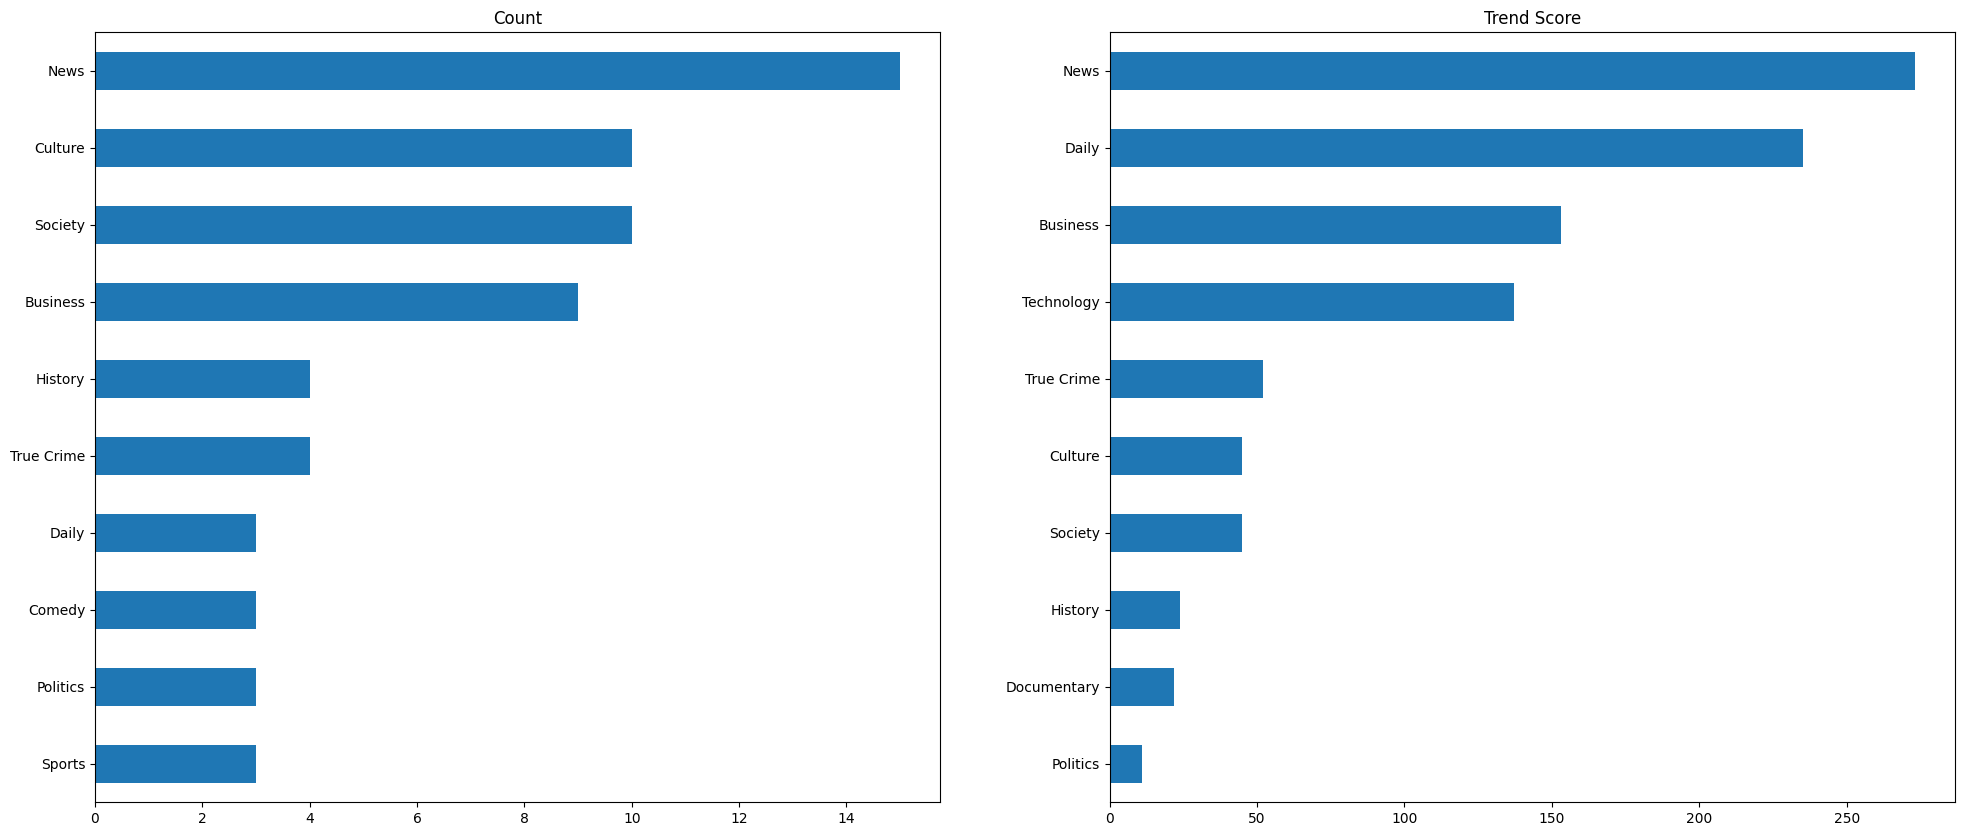

In [177]:
%matplotlib inline
#Visualising the category count and trend scores
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.sort_values(by="Count").plot(kind="barh", ax=axes[0], subplots=True, legend= False)
highest_scores.sort_values(by="Trend Score").plot(kind="barh", ax=axes[1], subplots=True, legend= False)

plt.show()

In [178]:
d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())

second_response = requests.get('https://api.podcastindex.org/api/1.0/recent/feeds?max=1000&lang=en&pretty', headers=params)

second_response.status_code

200

In [179]:
second_data = second_response.json()
second_feeds = second_data['feeds']
len(second_feeds)

1000

In [180]:
feeds = pd.DataFrame.from_records(second_feeds)
feeds.head()

,id,url,title,newestItemPublishTime,oldestItemPublishTime,description,image,itunesId,language,categories
0,5050013,https://feeds.simplecast.com/y_v_G3eS,B Fit,1668098993,1645720200,CrossFit trainer and veteran Conor Murphy tell...,https://image.simplecastcdn.com/images/32f166f...,1.611388e+09,en,"{'29': 'Health', '30': 'Fitness', '34': 'Nutri..."
1,1380211,https://media.rss.com/closetohome/feed.xml,WJFF - Close to Home with Leif Johansen,1668098825,1613005299,A twenty-something armchair policy wonk born a...,https://media.rss.com/closetohome/20210819_000...,1.554128e+09,en,"{'77': 'Society', '78': 'Culture', '79': 'Docu..."
2,5794742,https://media.rss.com/darkozarks/feed.xml,Dark Ozarks,1668098720,1667789589,Dark Ozarks is an exploration of the dark hist...,https://media.rss.com/darkozarks/20221107_0211...,1.653849e+09,en,"{'28': 'History', '77': 'Society', '78': 'Cult..."
3,261300,https://feeds.simplecast.com/MbghptDh,The Coach JB Show,1668098700,1576117384,"The Coach JB Show"" hosted by the coldest hustl...",https://image.simplecastcdn.com/images/4a4353d...,1.491443e+09,en,{'86': 'Sports'}
4,1697317,https://audioboom.com/channels/5026470.rss,HUN Podcasts (Hear us Now),1668098687,1633452387,Hun Podcasts (hear us now) is a National Lotte...,https://images.theabcdn.com/i/38503414/s=1400x...,NaN,en,"{'20': 'Education', '21': 'Courses', '53': 'Mu..."


In [181]:
# transforming date columns
feeds['newestItemPublishTime'] = pd.to_datetime(feeds['newestItemPublishTime'], unit='s', yearfirst=False)
feeds['newestItemPublishTime'].value_counts()

2022-11-10 14:00:00    81
2022-11-10 15:00:00    55
2022-11-10 16:00:00    42
2022-11-10 16:31:25    24
2022-11-10 13:00:00    12
                       ..
2022-11-10 15:21:07     1
2022-11-10 15:20:52     1
2022-11-10 15:20:25     1
2022-11-10 15:20:23     1
2022-11-10 14:46:40     1
Name: newestItemPublishTime, Length: 672, dtype: int64

In [182]:
feeds['categories'] = feeds['categories'].apply(lambda x: list(x.values()))
feeds['categories'].head(10)

0      [Health, Fitness, Nutrition, Music, Interviews]
1    [Society, Culture, Documentary, Government, Ne...
2    [History, Society, Culture, Documentary, True ...
3                                             [Sports]
4    [Education, Courses, Music, Commentary, Societ...
5    [Arts, Books, News, Commentary, Religion, Spir...
6    [Arts, Fashion, Beauty, Education, Self Improv...
7            [Health, Fitness, Medicine, Kids, Family]
8    [Business, Entrepreneurship, Management, Educa...
9                                       [Sports, News]
Name: categories, dtype: object

In [183]:
category_count_dict = dict()

for catgs in feeds['categories']:
    for category in catgs:
        if category in category_count_dict:
            category_count_dict[category] += 1
        else:
            category_count_dict[category] = 1

# category_count_dict
category_count = pd.DataFrame.from_dict(category_count_dict, orient="index")
category_count = category_count.rename(columns={0: "Count"})
most_used = category_count.sort_values(by="Count", ascending= False)
most_used = most_used.head(15)
most_used

,Count
News,212
Business,208
Sports,190
Society,188
Culture,188
Education,161
Religion,134
Spirituality,132
Health,97
Fitness,94


In [184]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 2400x1200 with 0 Axes>

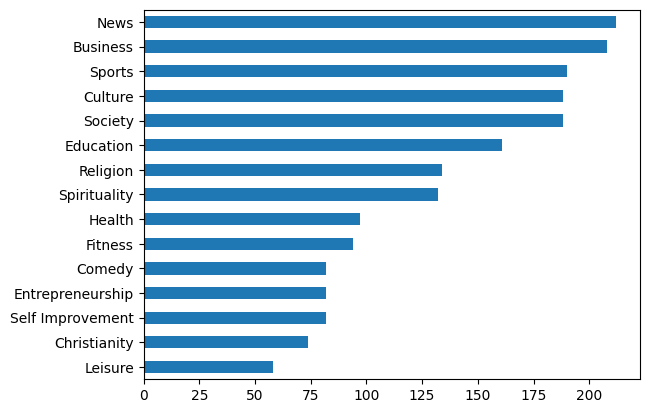

In [185]:
plt.style.use('default')
fig = plt.figure()
fig.set_size_inches((24, 12))
most_used.sort_values(by="Count").plot(kind='barh', legend=False)

plt.show()

In [186]:
d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())

stats_response = requests.get('https://api.podcastindex.org/api/1.0/stats/current?pretty', headers=params)

stats_response.status_code

200

In [187]:
stats_data = stats_response.json()
# stats_feeds = stats_data['feeds']
# len(second_feeds)
stats_data

{'status': 'true',
 'stats': {'feedCountTotal': 4030885,
  'episodeCountTotal': 136836755,
  'feedsWithNewEpisodes3days': 104278,
  'feedsWithNewEpisodes10days': 245256,
  'feedsWithNewEpisodes30days': 359197,
  'feedsWithNewEpisodes90days': 483418,
  'feedsWithValueBlocks': 10355},
 'description': 'Found matching feeds.'}